## Simulation of data using Julia

### Rohan L. Fernando

### June 2015

## Julia Packages 
* [List of registered Julia packages](http://docs.julialang.org/en/release-0.1/packages/packagelist/#available-packages) 
* Will use [Distributions Package](http://distributionsjl.readthedocs.org/en) to simulate data. 
* It can be added to your system with the command:

In [3]:
#Pkg.add("Distributions")

* This needs to be done only once. 

* But, to access the functions in the Distributions package the "using" command has to be invoked as:


In [34]:
using Distributions

## Simulate matrix of ``genotype" covariates

In [5]:
nRows = 10
nCols = 5
X = sample([0,1,2],(nRows,nCols))

10x5 Array{Int64,2}:
 1  2  1  1  0
 0  0  0  1  1
 1  0  1  2  2
 2  1  0  0  2
 1  1  1  0  2
 1  0  0  0  1
 0  2  2  1  2
 2  1  2  2  1
 1  0  2  2  0
 2  1  0  2  0

Each element in $\mathbf{X}$ is sampled from the array [0,1,2]. 

## Other methods of the function ``sample"

In [6]:
methods(sample)

# 7 methods for generic function "sample":
sample(a::AbstractArray{T,N}) at /Users/rohan/.julia/v0.3/StatsBase/src/sampling.jl:277
sample{T}(a::AbstractArray{T,N},n::Integer) at /Users/rohan/.julia/v0.3/StatsBase/src/sampling.jl:320
sample{T}(a::AbstractArray{T,N},dims::(Int64...,)) at /Users/rohan/.julia/v0.3/StatsBase/src/sampling.jl:324
sample(wv::WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/rohan/.julia/v0.3/StatsBase/src/sampling.jl:335
sample(a::AbstractArray{T,N},wv::WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/rohan/.julia/v0.3/StatsBase/src/sampling.jl:347
sample{T}(a::AbstractArray{T,N},wv::WeightVec{W,Vec<:AbstractArray{T<:Real,1}},n::Integer) at /Users/rohan/.julia/v0.3/StatsBase/src/sampling.jl:529
sample{T}(a::AbstractArray{T,N},wv::WeightVec{W,Vec<:AbstractArray{T<:Real,1}},dims::(Int64...,)) at /Users/rohan/.julia/v0.3/StatsBase/src/sampling.jl:532

## Add a column of ones for intercept

In [7]:
X = [ones(nRows,1) X]

10x6 Array{Float64,2}:
 1.0  1.0  2.0  1.0  1.0  0.0
 1.0  0.0  0.0  0.0  1.0  1.0
 1.0  1.0  0.0  1.0  2.0  2.0
 1.0  2.0  1.0  0.0  0.0  2.0
 1.0  1.0  1.0  1.0  0.0  2.0
 1.0  1.0  0.0  0.0  0.0  1.0
 1.0  0.0  2.0  2.0  1.0  2.0
 1.0  2.0  1.0  2.0  2.0  1.0
 1.0  1.0  0.0  2.0  2.0  0.0
 1.0  2.0  1.0  0.0  2.0  0.0

## Simulate effects from normal distribution

In [8]:
nRowsX, nColsX = size(X)
mean = 0.0
std  = 0.5
b = rand(Normal(mean,std),nColsX)

6-element Array{Float64,1}:
 -0.588095  
  0.00300013
 -0.490994  
  0.211137  
  0.838283  
  0.259775  

## Simulate phenotypic values

In [9]:
resStd = 1.0
y = X*b + rand(Normal(0,resStd),nRowsX)

10-element Array{Float64,1}:
  0.428195 
  0.891387 
  2.37782  
  0.0377457
 -0.457258 
 -2.18597  
 -0.405765 
  1.8095   
  0.770982 
  0.0214083

## Function to simulate data


In [10]:
using Distributions
function simDat(nObs,nLoci,bMean,bStd,resStd)
    X = [ones(nObs,1) sample([0,1,2],(nObs,nLoci))]
    b = rand(Normal(bMean,bStd),size(X,2))
    y = X*b + rand(Normal(0.0, resStd),nObs)
    return (y,X,b)
end

simDat (generic function with 1 method)

## Use of function simDat to simulate data

In [11]:
nObs     = 10
nLoci    = 5
bMean    = 0.0
bStd     = 0.5
resStd   = 1.0
res = simDat(nObs,nLoci,bMean,bStd,resStd)
y = res[1]
X = res[2]
b = res[3]

6-element Array{Float64,1}:
 -0.0613726
  0.0924577
 -0.276544 
 -0.439565 
  0.462588 
 -0.0115201

In [12]:
X

10x6 Array{Float64,2}:
 1.0  2.0  1.0  1.0  1.0  2.0
 1.0  2.0  1.0  1.0  0.0  0.0
 1.0  1.0  2.0  2.0  1.0  0.0
 1.0  2.0  2.0  1.0  2.0  0.0
 1.0  2.0  1.0  0.0  2.0  0.0
 1.0  1.0  0.0  2.0  0.0  0.0
 1.0  0.0  1.0  0.0  2.0  0.0
 1.0  2.0  1.0  1.0  0.0  0.0
 1.0  2.0  0.0  0.0  0.0  1.0
 1.0  2.0  1.0  0.0  2.0  0.0

## XSim: Genome sampler

* Simulate SNPs on chromosomes
* Random mating in finite population to generate LD
* Efficient algorithm for sampling sequence data
* [XSim paper](http://g3journal.org/content/early/2015/05/07/g3.115.016683.full.pdf+html)

## Install XSim

In [13]:
# installing package 
# only needs to be done once
#Pkg.clone("https://github.com/reworkhow/XSim.jl.git")

## Initialize sampler

In [14]:
using XSim
chrLength = 1.0
numChr    = 1
numLoci   = 2000
mutRate   = 0.0
locusInt  = chrLength/numLoci
mapPos   = [0:locusInt:(chrLength-0.0001)]
geneFreq = fill(0.5,numLoci)
XSim.init(numChr,numLoci,chrLength,geneFreq,mapPos,mutRate) 

## Simulate random mating in finite population

In [15]:
pop     = startPop()
nGen    = 20
popSize = 500
pop.popSample(nGen,popSize)

Sampling 500 animals into base population.
Sampling 500 animals into generation: 1
Sampling 500 animals into generation: 2
Sampling 500 animals into generation: 3
Sampling 500 animals into generation: 4
Sampling 500 animals into generation: 5
Sampling 500 animals into generation: 6
Sampling 500 animals into generation: 7
Sampling 500 animals into generation: 8
Sampling 500 animals into generation: 9
Sampling 500 animals into generation: 10
Sampling 500 animals into generation: 11
Sampling 500 animals into generation: 12
Sampling 500 animals into generation: 13
Sampling 500 animals into generation: 14
Sampling 500 animals into generation: 15
Sampling 500 animals into generation: 16
Sampling 500 animals into generation: 17
Sampling 500 animals into generation: 18
Sampling 500 animals into generation: 19


## Get genotypes

In [16]:
M = pop.getGenotypes()

500x2000 Array{Int64,2}:
 2  0  2  1  2  1  2  2  2  1  1  2  1  …  0  2  0  1  1  1  1  1  2  2  1  1
 1  2  1  0  1  2  2  1  1  2  0  2  2     0  1  0  1  2  2  1  2  0  1  0  0
 1  0  1  1  0  1  1  1  0  2  2  1  1     2  1  0  2  2  2  1  2  0  1  1  2
 1  1  0  0  2  0  2  1  1  2  0  1  1     0  2  1  2  2  1  1  1  2  2  1  1
 1  0  0  0  1  1  1  1  2  1  1  0  1     2  0  0  1  0  1  1  1  1  1  0  2
 2  1  2  2  2  1  2  1  1  1  0  1  2  …  1  2  1  1  0  2  0  2  1  0  0  0
 2  2  1  1  0  2  1  2  1  1  1  0  0     1  2  2  1  2  0  2  2  2  1  2  1
 1  1  1  1  0  2  2  1  1  2  0  1  2     2  1  2  0  0  0  1  0  1  1  1  1
 2  1  0  1  1  1  1  1  2  1  0  2  0     1  1  1  1  1  1  1  1  0  0  1  1
 1  1  2  2  2  0  2  1  1  2  1  1  1     1  0  2  2  1  1  1  1  2  2  1  0
 1  0  1  0  1  2  2  1  2  1  1  1  2  …  2  2  1  0  1  0  0  1  0  1  2  1
 0  2  1  1  0  1  2  1  2  2  1  2  2     1  1  2  1  1  2  2  0  0  1  1  2
 1  0  2  2  2  1  1  1  1  1  0  2  2 

## Randomly sample QTL positions 

In [17]:
k      = size(M,2)
nQTL   = 50
QTLPos = sample([1:k],nQTL,replace=false)

50-element Array{Int64,1}:
  365
 1504
  705
 1777
  286
 1210
  518
 1834
  848
 1333
 1870
   70
 1244
    ⋮
  723
 1140
  857
  722
  643
 1713
 1937
 1648
   38
  180
 1404
 1068

## Marker positions

In [18]:
mrkPos = deleteat!([1:k],sort(QTLPos))

1950-element Array{Int64,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
 1989
 1990
 1991
 1992
 1993
 1994
 1995
 1996
 1997
 1998
 1999
 2000

## QTL and marker matrices

In [19]:
Q = M[:,QTLPos]

500x50 Array{Int64,2}:
 0  2  0  0  1  0  2  1  1  1  2  1  0  …  1  1  0  1  1  1  2  0  2  1  1  1
 1  2  0  0  0  1  1  1  0  2  0  2  1     1  0  1  0  1  1  1  0  0  0  1  1
 1  2  0  0  1  2  0  2  2  0  0  2  1     2  1  1  1  2  1  2  2  1  1  1  1
 0  0  0  0  0  1  2  2  1  2  2  2  0     0  1  2  1  2  1  1  0  1  0  0  0
 1  1  1  0  0  2  2  1  0  1  1  1  0     1  1  1  1  1  0  1  2  0  0  2  0
 1  1  0  1  1  2  1  2  2  1  1  1  1  …  0  0  2  0  1  1  1  2  1  0  1  1
 1  2  2  1  1  1  2  2  1  2  1  2  1     1  0  1  0  0  0  1  1  0  0  0  0
 2  1  1  2  0  1  0  2  1  2  1  2  1     1  1  1  1  0  1  0  0  0  0  2  1
 1  1  1  2  1  1  2  1  2  1  1  2  1     0  2  1  0  1  1  1  0  1  1  2  2
 2  0  0  0  0  1  2  2  1  0  1  2  2     1  2  0  0  2  1  2  1  0  0  1  1
 1  0  1  2  1  0  1  2  1  2  1  1  2  …  1  0  0  1  0  1  0  1  0  1  0  2
 1  1  0  0  0  2  2  0  1  1  2  1  1     2  1  1  0  2  2  1  0  0  0  1  1
 0  0  0  1  2  0  1  0  2  1  2  0  2   

In [20]:
X = M[:,mrkPos]

500x1950 Array{Int64,2}:
 2  0  2  1  2  1  2  2  2  1  1  2  1  …  0  2  0  1  1  1  1  1  2  2  1  1
 1  2  1  0  1  2  2  1  1  2  0  2  2     0  1  0  1  2  2  1  2  0  1  0  0
 1  0  1  1  0  1  1  1  0  2  2  1  1     2  1  0  2  2  2  1  2  0  1  1  2
 1  1  0  0  2  0  2  1  1  2  0  1  1     0  2  1  2  2  1  1  1  2  2  1  1
 1  0  0  0  1  1  1  1  2  1  1  0  1     2  0  0  1  0  1  1  1  1  1  0  2
 2  1  2  2  2  1  2  1  1  1  0  1  2  …  1  2  1  1  0  2  0  2  1  0  0  0
 2  2  1  1  0  2  1  2  1  1  1  0  0     1  2  2  1  2  0  2  2  2  1  2  1
 1  1  1  1  0  2  2  1  1  2  0  1  2     2  1  2  0  0  0  1  0  1  1  1  1
 2  1  0  1  1  1  1  1  2  1  0  2  0     1  1  1  1  1  1  1  1  0  0  1  1
 1  1  2  2  2  0  2  1  1  2  1  1  1     1  0  2  2  1  1  1  1  2  2  1  0
 1  0  1  0  1  2  2  1  2  1  1  1  2  …  2  2  1  0  1  0  0  1  0  1  2  1
 0  2  1  1  0  1  2  1  2  2  1  2  2     1  1  2  1  1  2  2  0  0  1  1  2
 1  0  2  2  2  1  1  1  1  1  0  2  2 

## Simulation of breeding values and phenotypic values

In [21]:
nQTL = size(Q,2)
nObs = size(Q,1)
α = rand(Normal(0,1),nQTL)
a = Q*α
# scaling breeding values to have variance 25.0
v = var(a)
genVar = 25.0
a *= sqrt(genVar/v)
ans = var(a)
println("genetic variance = ", ans)
# formatted printing
@printf "genetic variance = %8.2f  " ans

genetic variance = 25.0
genetic variance =    25.00  

In [22]:
resVar = 75.0
resStd = sqrt(resVar)
e = rand(Normal(0,resStd),nObs)
y = 100 + a + e
@printf "phenotypic mean     = %8.2f  \n" Base.mean(y)
@printf "phenotypic variance = %8.2f  \n" var(y)

phenotypic mean     =    98.77  
phenotypic variance =   102.91  


## Simulate Crossbreeding using XSim

In [23]:
popA = pop.popNew(100)
popB = pop.popNew(100)
popAB = XSim.popCross(100,popA,popB)
MAB = popAB.getGenotypes()

Sampling 100 animals into generation: 1
Sampling 100 animals into generation: 1


100x2000 Array{Int64,2}:
 0  1  1  1  1  1  2  1  1  2  2  1  2  …  2  1  0  1  1  1  1  2  0  1  1  1
 1  0  0  0  0  1  2  1  2  2  2  0  1     2  1  2  0  2  1  2  1  1  1  2  2
 1  0  1  1  1  2  2  0  1  1  0  2  0     1  1  0  1  0  1  0  1  1  1  0  1
 1  1  1  1  1  1  1  1  1  1  2  2  2     1  2  1  1  1  0  2  1  1  1  2  1
 0  0  1  1  1  1  2  1  2  2  0  0  1     1  2  2  1  2  0  2  2  2  1  2  1
 0  1  1  2  2  1  0  2  1  0  0  1  1  …  0  0  2  1  2  2  0  0  1  1  0  1
 2  2  0  1  1  2  1  2  1  0  2  0  1     0  2  2  1  1  0  1  1  1  0  1  0
 2  1  0  1  1  2  2  2  1  0  1  1  1     0  1  2  2  2  1  1  1  2  1  1  1
 1  0  2  2  2  1  1  2  0  1  1  0  1     1  1  1  0  1  0  1  2  1  0  1  1
 2  1  1  1  1  0  1  2  1  1  2  1  1     1  1  0  1  1  1  0  2  0  1  0  1
 1  0  0  1  1  2  2  1  1  1  1  1  1  …  1  2  1  2  0  1  0  1  0  0  0  0
 1  2  0  1  1  1  2  2  0  1  1  0  2     2  2  2  1  1  0  2  0  2  1  2  1
 1  2  1  0  1  1  1  1  1  1  1  2  2 

## Calculate and plot gene frequencies 

In [24]:
freq=Base.mean(M,1)/2;

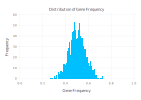

In [31]:
using Gadfly
plot(x=freq,Geom.histogram,
Guide.title("Distribution of Gene Frequency"),
Guide.ylabel("Frequency"),
Guide.xlabel("Gene Frequency"))

In [33]:
;ipython nbconvert --to slides wrkShpSlides1.ipynb

[NbConvertApp] Using existing profile dir: u'/Users/rohan/.ipython/profile_default'
[NbConvertApp] Converting notebook wrkShpSlides1.ipynb to slides
[NbConvertApp] Support files will be in wrkShpSlides1_files/
[NbConvertApp] Loaded template slides_reveal.tpl
[NbConvertApp] Writing 416961 bytes to wrkShpSlides1.slides.html
